<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/TempForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

%matplotlib inline

In [4]:
weather_data = pd.read_csv('weather_data_.csv')

In [5]:
weather_data

,time,date,tempC,windspeedMiles,windspeedKmph,winddirDegree,winddir16Point,weatherCode,weatherDesc,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,pressureInches,cloudcover,WindGustMiles,WindGustKmph,uvIndex
0,0,1/1/2019,9,6,10,272,W,122,Overcast,0.0,0.0,78,10,6,1035,31,100,10,15,1
1,300,1/1/2019,8,7,11,278,W,116,Partly cloudy,0.0,0.0,85,10,6,1034,31,34,10,17,1
2,600,1/1/2019,7,8,12,284,WNW,113,Sunny,0.0,0.0,88,10,6,1034,31,25,11,18,3
3,900,1/1/2019,7,8,13,294,WNW,116,Partly cloudy,0.0,0.0,88,10,6,1034,31,38,13,20,3
4,1200,1/1/2019,9,9,15,320,NW,116,Partly cloudy,0.0,0.0,81,10,6,1035,31,57,13,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,900,12/31/2021,12,14,23,206,SSW,122,Overcast,0.0,0.0,82,10,6,1017,30,92,21,35,3
8764,1200,12/31/2021,13,13,21,226,SW,122,Overcast,0.0,0.0,82,10,6,1019,30,100,18,29,3
8765,1500,12/31/2021,14,12,19,227,SW,116,Partly cloudy,0.0,0.0,81,10,6,1019,30,59,17,28,4
8766,1800,12/31/2021,12,13,20,227,SW,116,Partly cloudy,0.0,0.0,90,10,6,1020,30,32,20,32,1


In [6]:
#check the format of date
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8768 non-null   int64  
 1   date             8768 non-null   object 
 2   tempC            8768 non-null   int64  
 3   windspeedMiles   8768 non-null   int64  
 4   windspeedKmph    8768 non-null   int64  
 5   winddirDegree    8768 non-null   int64  
 6   winddir16Point   8768 non-null   object 
 7   weatherCode      8768 non-null   int64  
 8   weatherDesc      8768 non-null   object 
 9   precipMM         8768 non-null   float64
 10  precipInches     8768 non-null   float64
 11  humidity         8768 non-null   int64  
 12  visibility       8768 non-null   int64  
 13  visibilityMiles  8768 non-null   int64  
 14  pressure         8768 non-null   int64  
 15  pressureInches   8768 non-null   int64  
 16  cloudcover       8768 non-null   int64  
 17  WindGustMiles 

#### cloudcover: 
Refers to the fraction of the sky obscured by clouds when observed from a particular location

In [7]:
#returns the time format HH:MM:SS of a given string
def time_to_string(x):
    if x == 0:
        return '00:00:00'
    x = str(x)
    if len(x) == 3:
        return "0" + x[0:1] + ":" + x[1:3] +":00"
    else:
        return x[0:2] + ":" + x[2:4] +":00"

In [8]:
#change the format of the string to time format
weather_data['time'] = weather_data['time'].apply(time_to_string)

In [9]:
#change the date format and convert to string format
weather_data["date"] = pd.to_datetime(weather_data.date)
weather_data["date"] = weather_data["date"].dt.strftime('%Y-%m-%d')

In [10]:
weather_data.insert(loc=0, column='datetime', value=weather_data["date"] + " " + weather_data["time"])
weather_data = weather_data.drop(['date', 'time'],  axis=1)

In [11]:
weather_data['datetime'] = pd.to_datetime(weather_data.datetime)
weather_data['hour'] = weather_data['datetime'].dt.hour
weather_data['year'] = weather_data['datetime'].dt.year
weather_data['month'] = weather_data['datetime'].dt.month
weather_data['day'] = weather_data['datetime'].dt.day
weather_data = weather_data.drop(['datetime'],  axis=1)

In [12]:
weather_data.head(10)

,tempC,windspeedMiles,windspeedKmph,winddirDegree,winddir16Point,weatherCode,weatherDesc,precipMM,precipInches,humidity,...,pressure,pressureInches,cloudcover,WindGustMiles,WindGustKmph,uvIndex,hour,year,month,day
0,9,6,10,272,W,122,Overcast,0.0,0.0,78,...,1035,31,100,10,15,1,0,2019,1,1
1,8,7,11,278,W,116,Partly cloudy,0.0,0.0,85,...,1034,31,34,10,17,1,3,2019,1,1
2,7,8,12,284,WNW,113,Sunny,0.0,0.0,88,...,1034,31,25,11,18,3,6,2019,1,1
3,7,8,13,294,WNW,116,Partly cloudy,0.0,0.0,88,...,1034,31,38,13,20,3,9,2019,1,1
4,9,9,15,320,NW,116,Partly cloudy,0.0,0.0,81,...,1035,31,57,13,21,3,12,2019,1,1
5,10,7,12,338,NNW,122,Overcast,0.1,0.0,81,...,1035,31,89,10,17,2,15,2019,1,1
6,9,7,12,13,NNE,176,Patchy rain possible,0.2,0.0,74,...,1037,31,45,9,14,1,18,2019,1,1
7,7,8,13,15,NNE,116,Partly cloudy,0.0,0.0,69,...,1039,31,42,11,17,1,21,2019,1,1
8,6,8,12,11,NNE,113,Clear,0.0,0.0,73,...,1041,31,12,10,16,1,0,2019,1,2
9,4,8,13,356,N,113,Clear,0.0,0.0,74,...,1042,31,14,11,17,1,3,2019,1,2


In [13]:
#checking for missing values
missing_values = weather_data.isnull().sum()
missing_values

tempC              0
windspeedMiles     0
windspeedKmph      0
winddirDegree      0
winddir16Point     0
weatherCode        0
weatherDesc        0
precipMM           0
precipInches       0
humidity           0
visibility         0
visibilityMiles    0
pressure           0
pressureInches     0
cloudcover         0
WindGustMiles      0
WindGustKmph       0
uvIndex            0
hour               0
year               0
month              0
day                0
dtype: int64

#### Comment:
No missing values in the data

### EDA

#### Heat Map
A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. It ignore null and non-numeric values

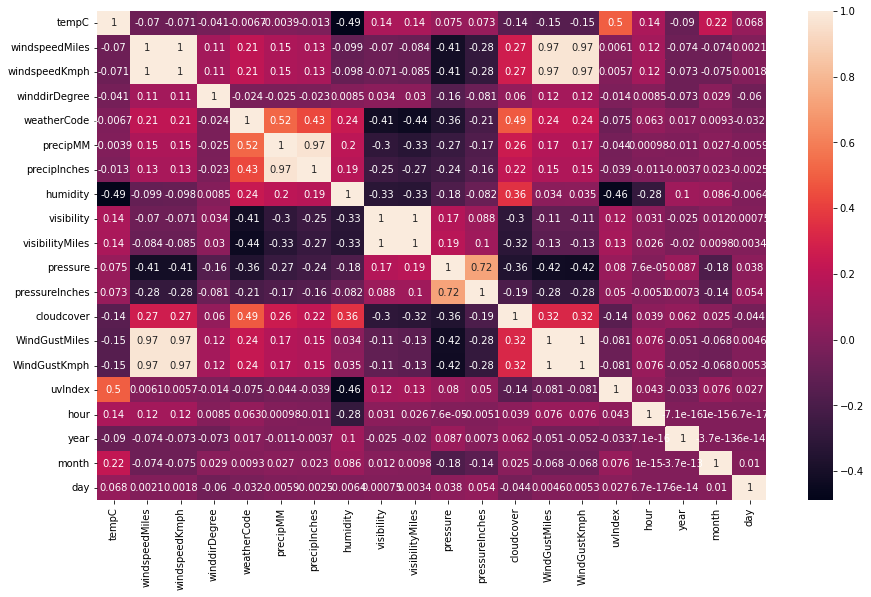

In [14]:
weather_corr = weather_data.corr()
## increasing the plot figure size to see the correlation coefficient values clearly
plt.subplots(figsize=(15, 9))
sns.heatmap(weather_corr, annot=True)

#### **Comment**:
1) tempC and uvIndex are positively correlated. <br>
2) tempC and humidity are negatively correlated. <br>
    But, the amount of UV radiation that reaches the earth on any given day is not affected by air temperature.(According to domain research)<br><br>
3) windspeedMiles, windspeedKmph have similar correlation values (obviously), one of them can be eliminated. <br>
    It's the samecase with WindGustMiles, WindGustKmph & visibility, visibilityMiles. <br>
4) Keeping the pressureInches column and dropping the actual pressure in millibars column because small numbers are easier to look at!  <br>


#### Since weatherCode, weatherDesc cols seem to have repeating values, so, I decided to check whether they are categorical in anyway

In [15]:
len(weather_data.weatherCode.unique())

37

In [16]:
len(weather_data.weatherDesc.unique())

38

#### Since they have unique values that are very close, checked whether they are related somehow.

In [17]:
weather_data.weatherCode.value_counts()

116    3094
113    1308
122    1238
119     808
176     592
353     547
296     272
266     255
302     178
143     121
356      49
248      40
308      35
338      34
293      33
263      30
299      27
200      14
317      12
332      10
389      10
326       7
311       7
371       7
305       6
386       5
362       4
335       4
182       4
329       4
359       3
323       3
368       2
230       2
227       1
320       1
395       1
Name: weatherCode, dtype: int64

In [18]:
weather_data.weatherDesc.value_counts()

Partly cloudy                          3094
Overcast                               1238
Cloudy                                  808
Clear                                   684
Sunny                                   624
Patchy rain possible                    592
Light rain shower                       547
Light rain                              272
Light drizzle                           255
Moderate rain                           178
Mist                                    121
Moderate or heavy rain shower            49
Fog                                      40
Heavy rain                               35
Heavy snow                               34
Patchy light rain                        33
Patchy light drizzle                     30
Moderate rain at times                   27
Thundery outbreaks possible              14
Light sleet                              12
Moderate snow                            10
Moderate or heavy rain with thunder      10
Light snow                      

#### I love this! 
count(weatherCode['113']= 1308 = count(weatherDesc['Clear']) + count(weatherCode['Sunny']) and counts of the rest of the values are matching too!!!<br>

This means weatherDesc and weatherCode are similar columns. Thus, one of them can be ignored. Since, weatherDesc is more specific, I decided to drop the weatherCode col.

The winddirDegree and winddir16Point cols indicate the same thing - the direction of the wind. Therefore one of them can be dropped. I am dropping the winddir16Point as it is categorical and non-numeric. 

In [19]:
weather_data.precipInches.value_counts() 

0.0    8180
0.1     420
0.2      96
0.3      45
0.4      12
0.5       7
0.6       5
0.7       2
0.8       1
Name: precipInches, dtype: int64

In [20]:
weather_data.precipMM.value_counts() 

0.0     6405
0.1      603
0.2      277
0.3      193
0.4      145
        ... 
9.8        1
8.8        1
5.6        1
11.6       1
8.2        1
Name: precipMM, Length: 107, dtype: int64

In [21]:
weather_data['precipMM'].equals(25.4 * weather_data['precipInches'])

False

The value of both the columns are not matching but they mean the same thing, the precipInches column has very few values when compared to precipMM, the reason for this is unclear but since both of them indicate the same entity - amount of water per square meter of earth surface. Therefore one of them can be dropped. I am dropping precipInches since this col is discrete.

In [22]:
weather_data = weather_data.drop(['windspeedMiles', 'WindGustMiles', 'visibilityMiles', 'pressure', 'weatherCode', 'winddir16Point', 'precipInches'], axis=1)

In [23]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tempC           8768 non-null   int64  
 1   windspeedKmph   8768 non-null   int64  
 2   winddirDegree   8768 non-null   int64  
 3   weatherDesc     8768 non-null   object 
 4   precipMM        8768 non-null   float64
 5   humidity        8768 non-null   int64  
 6   visibility      8768 non-null   int64  
 7   pressureInches  8768 non-null   int64  
 8   cloudcover      8768 non-null   int64  
 9   WindGustKmph    8768 non-null   int64  
 10  uvIndex         8768 non-null   int64  
 11  hour            8768 non-null   int64  
 12  year            8768 non-null   int64  
 13  month           8768 non-null   int64  
 14  day             8768 non-null   int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 1.0+ MB


### Feature Encoding

Converting all the non-numeric features into numerical value using feature encoding - Target Encoding or Mean encoding

In [24]:
pip install category_encoders

     |████████████████████████████████| 86 kB 3.2 MB/s 


In [25]:
from category_encoders import TargetEncoder
from category_encoders import OneHotEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
description_encoder = TargetEncoder()
weather_data['weatherDesc'] = description_encoder.fit_transform(weather_data['weatherDesc'], weather_data['tempC'])

In [27]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data


weather_data = encode(weather_data, 'month', 12)
weather_data = weather_data.drop(['month'],  axis=1)
weather_data = encode(weather_data, 'day', 365)
weather_data = weather_data.drop(['day'],  axis=1)
weather_data = weather_data.drop(['year'],  axis=1)

### Feature Scaling

#### Min-Max Scaling
Regression models perform better when features are on a relatively similar scale and/or close to normally distributed.

In [28]:
weather_data.head()

,tempC,windspeedKmph,winddirDegree,weatherDesc,precipMM,humidity,visibility,pressureInches,cloudcover,WindGustKmph,uvIndex,hour,month_sin,month_cos,day_sin,day_cos
0,9,10,272,11.235057,0.0,78,10,31,100,15,1,0,0.5,0.866025,0.017213,0.999852
1,8,11,278,12.768908,0.0,85,10,31,34,17,1,3,0.5,0.866025,0.017213,0.999852
2,7,12,284,14.185897,0.0,88,10,31,25,18,3,6,0.5,0.866025,0.017213,0.999852
3,7,13,294,12.768908,0.0,88,10,31,38,20,3,9,0.5,0.866025,0.017213,0.999852
4,9,15,320,12.768908,0.0,81,10,31,57,21,3,12,0.5,0.866025,0.017213,0.999852


In [29]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
weather_data_scaled = mm_scaler.fit_transform(weather_data)
weather_data_final = pd.DataFrame(weather_data_scaled, columns = weather_data.columns)

In [30]:
weather_data_final.head()

,tempC,windspeedKmph,winddirDegree,weatherDesc,precipMM,humidity,visibility,pressureInches,cloudcover,WindGustKmph,uvIndex,hour,month_sin,month_cos,day_sin,day_cos
0,0.372093,0.20,0.755556,0.546567,0.0,0.734177,1.0,1.0,1.00,0.211268,0.00,0.000000,0.75,0.933013,0.0,1.0
1,0.348837,0.22,0.772222,0.616086,0.0,0.822785,1.0,1.0,0.34,0.239437,0.00,0.142857,0.75,0.933013,0.0,1.0
2,0.325581,0.24,0.788889,0.680309,0.0,0.860759,1.0,1.0,0.25,0.253521,0.25,0.285714,0.75,0.933013,0.0,1.0
3,0.325581,0.26,0.816667,0.616086,0.0,0.860759,1.0,1.0,0.38,0.281690,0.25,0.428571,0.75,0.933013,0.0,1.0
4,0.372093,0.30,0.888889,0.616086,0.0,0.772152,1.0,1.0,0.57,0.295775,0.25,0.571429,0.75,0.933013,0.0,1.0


In [31]:
from sklearn.model_selection import train_test_split
X = weather_data_final.iloc[:,1:]
y = weather_data_final['tempC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Selection and model training 

In [32]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### **Linear Regression**

In [103]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
model = RandomForestRegressor()
lr = Pipeline(steps=[('s',rfe),('m',model)])
test_results = list()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)
scores_nmae = cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(lr, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
scores_nmse = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [104]:
test_results = list()
train_results = list()
lr.fit(X, y)
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
test_results.append(mean_absolute_error(y_test,y_pred))
test_results.append(r2_score(y_test,y_pred))
test_results.append(mean_squared_error(y_test,y_pred))
train_results.append(mean_absolute_error(y_train,y_train_pred))
train_results.append(r2_score(y_train,y_train_pred))
train_results.append(mean_squared_error(y_train,y_train_pred))

In [105]:
print('Training scores:')
print('NMAE> %.3f' % (train_results[0]))
print('R2> %.3f' % (train_results[1]))
print('MSE> %.3f' % (train_results[2]))
print('Validation scores:')
print('NMAE> %.3f (%.3f)' % (mean(scores_nmae), std(scores_nmae)))
print('R2> %.3f (%.3f)' % (mean(scores_r2), std(scores_r2)))
print('MSE> %.3f (%.3f)' % (mean(scores_nmse), std(scores_nmse)))
print('Testing scores:')
print('NMAE> %.3f' % (test_results[0]))
print('R2> %.3f' % (test_results[1]))
print('MSE> %.3f' % (test_results[2]))

Testing scores:
NMAE> 0.013
R2> 0.984
MSE> 0.000
Validation scores:
NMAE> -0.036 (0.001)
R2> 0.882 (0.011)
MSE> -0.002 (0.000)
Testing scores:
NMAE> 0.013
R2> 0.984
MSE> 0.000


### **Random Forest Regressor**

In [106]:
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
model = RandomForestRegressor()
rf = Pipeline(steps=[('s',rfe),('m',model)])
test_results = list()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)
scores_nmae = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(rf, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
scores_nmse = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [107]:
test_results = list()
train_results = list()
rf.fit(X, y)
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
test_results.append(mean_absolute_error(y_test,y_pred))
test_results.append(r2_score(y_test,y_pred))
test_results.append(mean_squared_error(y_test,y_pred))
train_results.append(mean_absolute_error(y_train,y_train_pred))
train_results.append(r2_score(y_train,y_train_pred))
train_results.append(mean_squared_error(y_train,y_train_pred))

In [108]:
print('Training scores:')
print('NMAE> %.3f' % (train_results[0]))
print('R2> %.3f' % (train_results[1]))
print('MSE> %.3f' % (train_results[2]))
print('Validation scores:')
print('NMAE> %.3f (%.3f)' % (mean(scores_nmae), std(scores_nmae)))
print('R2> %.3f (%.3f)' % (mean(scores_r2), std(scores_r2)))
print('MSE> %.3f (%.3f)' % (mean(scores_nmse), std(scores_nmse)))
print('Testing scores:')
print('NMAE> %.3f' % (test_results[0]))
print('R2> %.3f' % (test_results[1]))
print('MSE> %.3f' % (test_results[2]))

Testing scores:
NMAE> 0.012
R2> 0.986
MSE> 0.000
Validation scores:
NMAE> -0.033 (0.001)
R2> 0.899 (0.009)
MSE> -0.002 (0.000)
Testing scores:
NMAE> 0.012
R2> 0.986
MSE> 0.000


### **SGD Regressor**

In [109]:
rfe = RFE(estimator=SGDRegressor(), n_features_to_select=10)
model = RandomForestRegressor()
sgd = Pipeline(steps=[('s',rfe),('m',model)])
test_results = list()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)
scores_nmae = cross_val_score(sgd, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(sgd, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
scores_nmse = cross_val_score(sgd, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [110]:
test_results = list()
train_results = list()
sgd.fit(X, y)
y_pred = sgd.predict(X_test)
y_train_pred = sgd.predict(X_train)
test_results.append(mean_absolute_error(y_test,y_pred))
test_results.append(r2_score(y_test,y_pred))
test_results.append(mean_squared_error(y_test,y_pred))
train_results.append(mean_absolute_error(y_train,y_train_pred))
train_results.append(r2_score(y_train,y_train_pred))
train_results.append(mean_squared_error(y_train,y_train_pred))

In [111]:
print('Training scores:')
print('NMAE> %.3f' % (train_results[0]))
print('R2> %.3f' % (train_results[1]))
print('MSE> %.3f' % (train_results[2]))
print('Validation scores:')
print('NMAE> %.3f (%.3f)' % (mean(scores_nmae), std(scores_nmae)))
print('R2> %.3f (%.3f)' % (mean(scores_r2), std(scores_r2)))
print('MSE> %.3f (%.3f)' % (mean(scores_nmse), std(scores_nmse)))
print('Testing scores:')
print('NMAE> %.3f' % (test_results[0]))
print('R2> %.3f' % (test_results[1]))
print('MSE> %.3f' % (test_results[2]))

Testing scores:
NMAE> 0.013
R2> 0.983
MSE> 0.000
Validation scores:
NMAE> -0.036 (0.001)
R2> 0.876 (0.010)
MSE> -0.002 (0.000)
Testing scores:
NMAE> 0.013
R2> 0.981
MSE> 0.000


### SVR

In [34]:
rfe = RFE(estimator=SVR(C=1.0, epsilon=0.2,kernel="linear"), n_features_to_select=10)
model = RandomForestRegressor()
svr = Pipeline(steps=[('s',rfe),('m',model)])
test_results = list()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)
scores_nmae = cross_val_score(svr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(svr, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
scores_nmse = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [35]:
test_results = list()
train_results = list()
svr.fit(X, y)
y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)
test_results.append(mean_absolute_error(y_test,y_pred))
test_results.append(r2_score(y_test,y_pred))
test_results.append(mean_squared_error(y_test,y_pred))
train_results.append(mean_absolute_error(y_train,y_train_pred))
train_results.append(r2_score(y_train,y_train_pred))
train_results.append(mean_squared_error(y_train,y_train_pred))

In [36]:
print('Training scores:')
print('NMAE> %.3f' % (train_results[0]))
print('R2> %.3f' % (train_results[1]))
print('MSE> %.3f' % (train_results[2]))
print('Validation scores:')
print('NMAE> %.3f (%.3f)' % (mean(scores_nmae), std(scores_nmae)))
print('R2> %.3f (%.3f)' % (mean(scores_r2), std(scores_r2)))
print('MSE> %.3f (%.3f)' % (mean(scores_nmse), std(scores_nmse)))
print('Testing scores:')
print('NMAE> %.3f' % (test_results[0]))
print('R2> %.3f' % (test_results[1]))
print('MSE> %.3f' % (test_results[2]))

Training scores:
NMAE> 0.013
R2> 0.985
MSE> 0.000
Validation scores:
NMAE> -0.036 (0.001)
R2> 0.881 (0.010)
MSE> -0.002 (0.000)
Testing scores:
NMAE> 0.012
R2> 0.986
MSE> 0.000


### **Comment**:
#### randomForest did slightly better than other models.

### **AdaBoost**

In [41]:
from sklearn.ensemble import AdaBoostRegressor
rfe = RFE(estimator=AdaBoostRegressor(), n_features_to_select=10)
model = RandomForestRegressor()
adb = Pipeline(steps=[('s',rfe),('m',model)])
test_results = list()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)
scores_nmae = cross_val_score(adb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(adb, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
scores_nmse = cross_val_score(adb, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [42]:
test_results = list()
train_results = list()
adb.fit(X, y)
y_pred = adb.predict(X_test)
y_train_pred = adb.predict(X_train)
test_results.append(mean_absolute_error(y_test,y_pred))
test_results.append(r2_score(y_test,y_pred))
test_results.append(mean_squared_error(y_test,y_pred))
train_results.append(mean_absolute_error(y_train,y_train_pred))
train_results.append(r2_score(y_train,y_train_pred))
train_results.append(mean_squared_error(y_train,y_train_pred))

In [43]:
print('Training scores:')
print('NMAE> %.3f' % (train_results[0]))
print('R2> %.3f' % (train_results[1]))
print('MSE> %.3f' % (train_results[2]))
print('Validation scores:')
print('NMAE> %.3f (%.3f)' % (mean(scores_nmae), std(scores_nmae)))
print('R2> %.3f (%.3f)' % (mean(scores_r2), std(scores_r2)))
print('MSE> %.3f (%.3f)' % (mean(scores_nmse), std(scores_nmse)))
print('Testing scores:')
print('NMAE> %.3f' % (test_results[0]))
print('R2> %.3f' % (test_results[1]))
print('MSE> %.3f' % (test_results[2]))

Training scores:
NMAE> 0.012
R2> 0.987
MSE> 0.000
Validation scores:
NMAE> -0.033 (0.001)
R2> 0.896 (0.010)
MSE> -0.002 (0.000)
Testing scores:
NMAE> 0.011
R2> 0.987
MSE> 0.000


### **Comment**:

The performance is slightly better than randomForest

### **Gradient** **Boosting**

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=10)
model = RandomForestRegressor()
gbr = Pipeline(steps=[('s',rfe),('m',model)])
test_results = list()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)
scores_nmae = cross_val_score(gbr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(gbr, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
scores_nmse = cross_val_score(gbr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [46]:
test_results = list()
train_results = list()
gbr.fit(X, y)
y_pred = gbr.predict(X_test)
y_train_pred = gbr.predict(X_train)
test_results.append(mean_absolute_error(y_test,y_pred))
test_results.append(r2_score(y_test,y_pred))
test_results.append(mean_squared_error(y_test,y_pred))
train_results.append(mean_absolute_error(y_train,y_train_pred))
train_results.append(r2_score(y_train,y_train_pred))
train_results.append(mean_squared_error(y_train,y_train_pred))

In [47]:
print('Training scores:')
print('NMAE> %.3f' % (train_results[0]))
print('R2> %.3f' % (train_results[1]))
print('MSE> %.3f' % (train_results[2]))
print('Validation scores:')
print('NMAE> %.3f (%.3f)' % (mean(scores_nmae), std(scores_nmae)))
print('R2> %.3f (%.3f)' % (mean(scores_r2), std(scores_r2)))
print('MSE> %.3f (%.3f)' % (mean(scores_nmse), std(scores_nmse)))
print('Testing scores:')
print('NMAE> %.3f' % (test_results[0]))
print('R2> %.3f' % (test_results[1]))
print('MSE> %.3f' % (test_results[2]))

Training scores:
NMAE> 0.012
R2> 0.987
MSE> 0.000
Validation scores:
NMAE> -0.032 (0.001)
R2> 0.901 (0.008)
MSE> -0.002 (0.000)
Testing scores:
NMAE> 0.012
R2> 0.987
MSE> 0.000


### **Training** **Scores** - **Visualization**



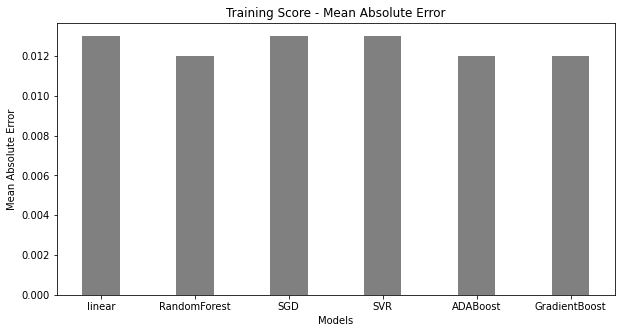

In [53]:
#training scores plotting
MAE = {'linear':0.013, 'RandomForest': 0.012,'SGD': 0.013,'SVR': 0.013,'ADABoost': 0.012,'GradientBoost': 0.012}
R2 = {'linear':0.984,'RandomForest':0.986,'SGD':0.983,'SVR':0.985,'ADABoost':0.987,'GradientBoost':0.987}
MSE = {'linear':0.000,'RandomForest':0.000,'SGD':0.000,'SVR':0.000,'ADABoost':0.000,'GradientBoost':0.000}

models = list(MAE.keys())
values = list(MAE.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, values, color ='grey', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("Training Score - Mean Absolute Error")
plt.show()

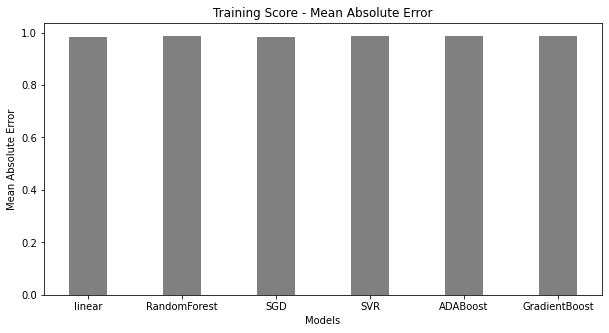

In [52]:
models = list(R2.keys())
values = list(R2.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, values, color ='grey', width = 0.4)
plt.xlabel("Models")
plt.ylabel("R2")
plt.title("Training Score - R- Square")
plt.show()

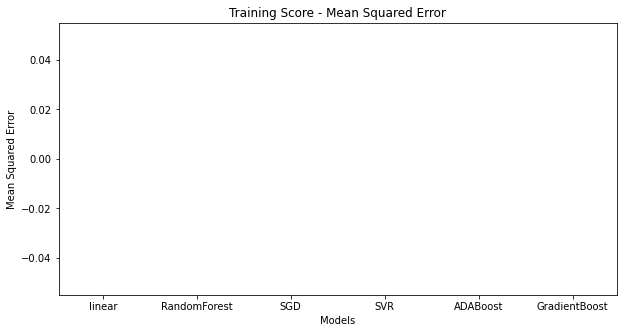

In [54]:
models = list(MSE.keys())
values = list(MSE.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, values, color ='grey', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Training Score - Mean Squared Error")
plt.show()

### **Validation** **Scores** - **Visualization**

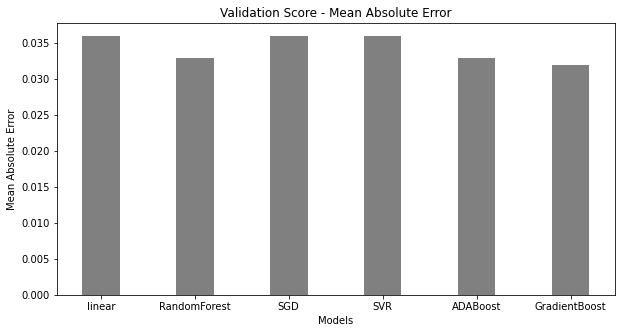

In [55]:
MAE_val = {'linear':0.036, 'RandomForest': 0.033,'SGD': 0.036,'SVR': 0.036,'ADABoost': 0.033,'GradientBoost': 0.032}
R2_val = {'linear':0.882,'RandomForest':0.899,'SGD':0.876,'SVR':0.881,'ADABoost':0.987,'GradientBoost':0.987}
MSE_val = {'linear':0.002,'RandomForest':0.002,'SGD':0.002,'SVR':0.002,'ADABoost':0.002,'GradientBoost':0.002}

models = list(MAE_val.keys())
values = list(MAE_val.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, values, color ='grey', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("Validation Score - Mean Absolute Error")
plt.show()

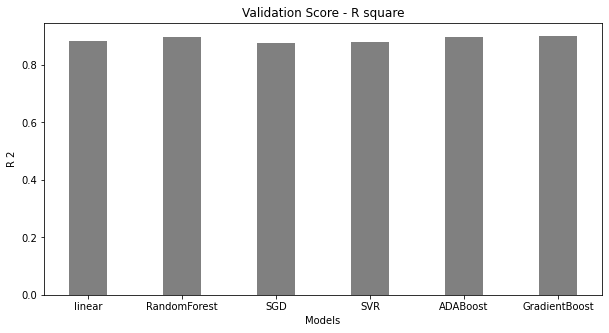

In [56]:
models = list(R2_val.keys())
values = list(R2_val.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, values, color ='grey', width = 0.4)
plt.xlabel("Models")
plt.ylabel("R 2")
plt.title("Validation Score - R square")
plt.show()

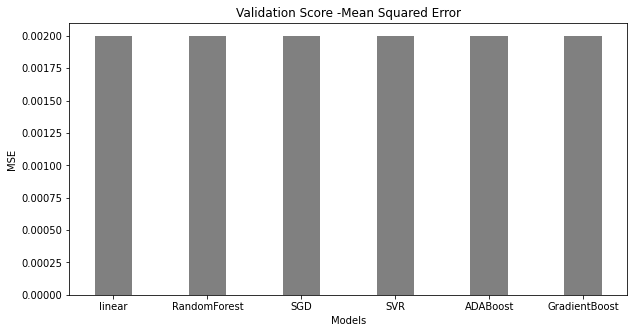

In [57]:
models = list(MSE_val.keys())
values = list(MSE_val.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, values, color ='grey', width = 0.4)
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("Validation Score -Mean Squared Error")
plt.show()

### **Testing** **Scores** - Visualization

In [ ]:
#model = [[training], [validation], [testing]]
linear = [[0.013, 0.984, 0.000], [0.036, 0.882, 0.002], [0.013, 0.984, 0.000]] 
randomForest = [[0.012, 0.986, 0.000],[0.033, 0.899, 0.002],[0.012, 0.986, 0.000]]
sgdReg = [[ 0.013, 0.983, 0.000], [0.036, 0.876, 0.002], [0.013, 0.981, 0.000]]
svreg = [[0.013, 0.985, 0.000], [0.036, 0.881, 0.002], [0.012, 0.986, 0.000]]

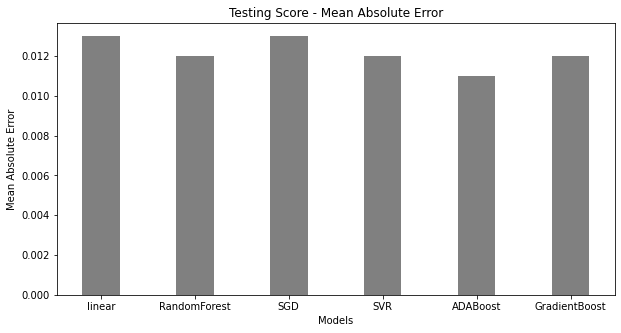

In [58]:
MAE_test = {'linear':0.013, 'RandomForest': 0.012,'SGD': 0.013,'SVR': 0.012,'ADABoost': 0.011,'GradientBoost': 0.012}
R2_test = {'linear':0.984,'RandomForest':0.986,'SGD':0.981,'SVR':0.986,'ADABoost':0.6,'GradientBoost':0.901}
MSE_test = {'linear':0.000,'RandomForest':0.000,'SGD':0.000,'SVR':0.000,'ADABoost':0.000,'GradientBoost':0.000}

models = list(MAE_test.keys())
values = list(MAE_test.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, values, color ='grey', width = 0.4)
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("Testing Score - Mean Absolute Error")
plt.show()

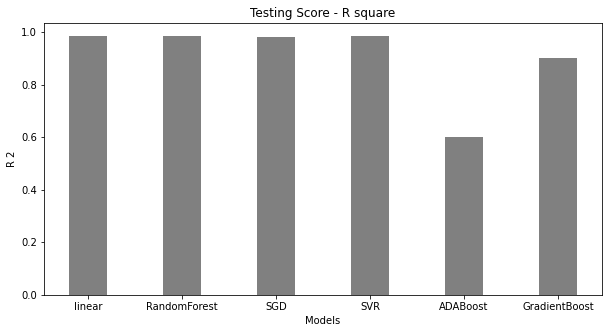

In [60]:
models = list(R2_test.keys())
values = list(R2_test.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, values, color ='grey', width = 0.4)
plt.xlabel("Models")
plt.ylabel("R 2")
plt.title("Testing Score - R square")
plt.show()

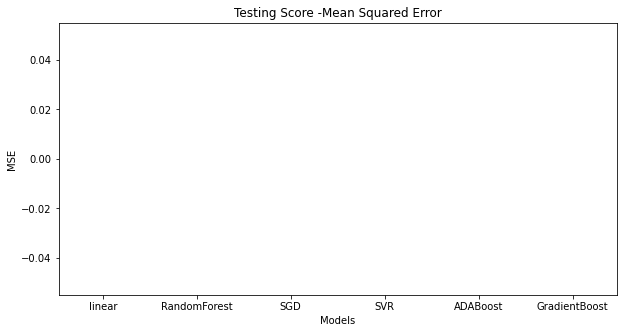

In [59]:
models = list(MSE_test.keys())
values = list(MSE_test.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, values, color ='grey', width = 0.4)
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("Testing Score -Mean Squared Error")
plt.show()

### **Comment**:
Training scores are high but validation scores are low - therefore they are slightly overfitting but since they gave comparable scores in testing, this is not a huge issue.

 
#### RandomForest performs well in normal models.

### **Overall**:
#### Gradient Boost performs well on a whole.


### Ignore the below cells

In [ ]:
#mean signed deviation
def msd(y_true, y_pred):
    return (y_pred - y_true).mean()
msd = msd(y_test,y_pred)
print(msd)

In [ ]:
print('Training scores:')
print('NMAE> %.3f' % (train_results[0]))
print('R2> %.3f' % (train_results[1]))
print('MSE> %.3f' % (train_results[2]))
print('Validation scores:')
print('NMAE> %.3f (%.3f)' % (mean(scores_nmae), std(scores_nmae)))
print('R2> %.3f (%.3f)' % (mean(scores_r2), std(scores_r2)))
print('MSE> %.3f (%.3f)' % (mean(scores_nmse), std(scores_nmse)))
print('Testing scores:')
print('NMAE> %.3f' % (test_results[0]))
print('R2> %.3f' % (test_results[1]))
print('MSE> %.3f' % (test_results[2]))

In [ ]:
# get the dataset
#def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	#return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
	model = RandomForestRegressor()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
	model = RandomForestRegressor()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=SGDRegressor(), n_features_to_select=10)
	model = RandomForestRegressor()
	models['sgd'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=MLPRegressor(), n_features_to_select=10)
	model = RandomForestRegressor()
	models['mlp'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=SVR(C=1.0, epsilon=0.2), n_features_to_select=10)
	model = RandomForestRegressor()
	models['svr'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a given model using cross-validation
def evaluate_and_train_model(model, X, y, X_test, y_test):
    test_results = list()
    cv = RepeatedKFold(n_splits=10, n_repeats=25, random_state=100)
    scores_nmae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    scores_r2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    scores_nmse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    test_results.append(mean_absolute_error(y_test,y_pred))
    test_results.append(r2_score(y_test,y_pred))
    test_results.append(mean_squared_error(y_test,y_pred))
    return scores_nmae, scores_r2, scores_nmse, test_results

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results_nmae, results_r2, results_nmse, names, test_results = list(), list(), list(), list(), list()
for name, model in models.items():
    #get the training and testing scores
    scores_nmae, scores_r2, scores_nmse, test_results = evaluate_and_train_model(model, X_train, y_train, X_test, y_test)
    results_nmae.append(scores_nmae)
    results_r2.append(scores_r2)
    results_nmse.append(scores_nmse)
    names.append(name)
    print('Training scores:')
    print('NMAE>%s %.3f (%.3f)' % (name, mean(scores_nmae), std(scores_nmae)))
    print('R2>%s %.3f (%.3f)' % (name, mean(scores_r2), std(scores_r2)))
    print('MSE>%s %.3f (%.3f)' % (name, mean(scores_nmse), std(scores_nmse)))
    print('Testing scores:')
    print('NMAE>%s %.3f' % (name, test_results[0]))
    print('R2>%s %.3f' % (name, test_results[1]))
    print('MSE>%s %.3f' % (name, test_results[2]))
# plot model performance for comparison
pyplot.boxplot(results_nmae, labels=names, showmeans=True)
pyplot.show()
pyplot.boxplot(results_r2, labels=names, showmeans=True)
pyplot.show()
pyplot.boxplot(results_nmse, labels=names, showmeans=True)
pyplot.show()